<a href="https://colab.research.google.com/github/S1LV3R108/black/blob/main/engineering_colleges_in_india_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the dataset**

In [ ]:
#install kaggle
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving engineering colleges in India.csv to engineering colleges in India.csv


{'engineering colleges in India.csv': b'College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees\r\nNational Institute of Technology Rourkela ,Co-Ed,647 Acres,4811,329,2007,3.12,,"B.Tech Mechanical Engineering, B.Tech Computer Science and Engineering, B.Tech Electrical Engineering, B.Tech Civil Engineering, B.Tech Electronics and Communication Engineering, B.Tech Chemical Engineering, B.Tech Metallurgical and Materials Engineering, B.Tech Electronics and Instrumentation Engineering, B.Tech Ceramic Engineering, B.Tech Mining Engineering, B.Tech Industrial Design, B.Tech Food Process Engineering, B.Tech Biomedical Engineering, B.Tech Biotechnology Engineering, B.Arch, M.Sc Chemistry Integrated, M.Sc Life Science Integrated, M.Sc Mathematics Integrated, M.Sc Physics Integrated, B.Tech and M.Tech Metallurgical and Materials Engineering, B.Tech Ceramic Engineering and 

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json file to the folder
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#permission for the jason to act
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#list all the dataset in kaggle
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d shrirangmhalgi/engineering-colleges-in-india

Dataset URL: https://www.kaggle.com/datasets/shrirangmhalgi/engineering-colleges-in-india
License(s): other
  0% 0.00/573k [00:00<?, ?B/s]
100% 573k/573k [00:00<00:00, 88.7MB/s]


In [ ]:
!unzip engineering-colleges-in-india.zip

Archive:  engineering-colleges-in-india.zip
replace engineering colleges in India.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: engineering colleges in India.csv  


**importing the modules**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

import os

**data cleaning**

In [ ]:
file_name = "/content/engineering colleges in India.csv"
df = pd.read_csv(file_name)
pd.set_option('display.max_columns', None)
df.head()

College Name Genders Accepted  \
0         National Institute of Technology Rourkela             Co-Ed   
1  Visvesvaraya National Institute of Technology ...            Co-Ed   
2             Netaji Subhas University of Technology            Co-Ed   
3                      Birla Institute of Technology            Co-Ed   
4  International Institute of Information Technology            Co-Ed   

  Campus Size Total Student Enrollments Total Faculty Established Year Rating  \
0   647 Acres                      4811           329             2007   3.12   
1   215 Acres                      1071           192             2007    NaN   
2   145 Acres                      3759           101             2018    NaN   
3   980 Acres                      4506           284             1955    NaN   
4    66 Acres                      1721            85             2001   3.05   

  University                                            Courses  \
0        NaN  B.Tech Mechanical Engineering, B.Tech Computer...   
1        NaN  B.Tech Computer Science Engineering, B.Tech El...   
2        NaN  B.Tech Computer Engineering, B.Tech Electronic...   
3        NaN  B.Tech Computer Science Engineering, B.Tech El...   
4        NaN  B.Tech Computer Science and Engineering, M.Tec...   

                                          Facilities       City        State  \
0  Boys Hostel, Girls Hostel, Gym, Library, Sport...   Rourkela       Odisha   
1  Boys Hostel, Girls Hostel, Gym, Library, Sport...     Nagpur  Maharashtra   
2  Boys Hostel, Girls Hostel, Gym, Library, Sport...  New Delhi        Delhi   
3  Boys Hostel, Girls Hostel, Gym, Library, Sport...     Ranchi    Jharkhand   
4  Boys Hostel, Girls Hostel, Gym, Library, Sport...  Hyderabad    Telangana   

  Country       College Type       Average Fees  
0   India  Public/Government           350600.0  
1   India  Public/Government  273596.6666666667  
2   India  Public/Government           352320.0  
3   India            Private  596686.0465116279  
4   India            Private  756666.6666666666

In [ ]:
df.tail()

College Name Genders Accepted  \
5441                        BES Institute of Technology            Co-Ed   
5442                        Radical Polytechnic College            Co-Ed   
5443       Trimurti Institute of Technology Polytechnic            Co-Ed   
5444  RV Parankar College of Engineering and Technology            Co-Ed   
5445                       Centre for Design Excellence            Co-Ed   

     Campus Size Total Student Enrollments Total Faculty Established Year  \
5441     4 Acres                       NaN            31             2003   
5442         NaN                       NaN           NaN             2013   
5443         NaN                        22            55             2009   
5444         NaN                        38            10             2015   
5445         NaN                       NaN            20              NaN   

     Rating                                         University  \
5441    NaN                                                NaN   
5442    NaN                                                NaN   
5443    NaN                                                NaN   
5444    NaN  Rashtrasant Tukadoji Maharaj Nagpur University...   
5445    NaN              Vivekananda Global University, Jaipur   

                                                Courses  \
5441  Diploma in Civil Engineering, Diploma in Compu...   
5442  Diploma in Civil Engineering, Diploma in Mecha...   
5443  Diploma in Electrical Engineering, Diploma in ...   
5444  BE Civil Engineering, BE Electrical Engineerin...   
5445  B.Arch, B.Des Fashion and Textile Design, B.De...   

                                             Facilities       City  \
5441  Girls Hostel, Library, Sports, Cafeteria, Audi...  Bengaluru   
5442  Boys Hostel, Girls Hostel, Library, Sports, Wi...   Amritsar   
5443   Library, Sports, IT Infrastructure, Laboratories     Paldhi   
5444  Library, Sports, Cafeteria, Auditorium, IT Inf...       Arvi   
5445  Boys Hostel, Girls Hostel, Library, Sports, Au...     Jaipur   

            State Country College Type Average Fees  
5441    Karnataka   India      Private      38490.0  
5442       Punjab   India      Private      75100.0  
5443  Maharashtra   India      Private     157000.0  
5444  Maharashtra   India      Private     272000.0  
5445    Rajasthan   India      Private     897500.0

In [ ]:
n_rows, n_columns = df.shape

print("Total number of rows = ", n_rows)
print("Total number of columns = ", n_columns)

Total number of rows =  5446
Total number of columns =  15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   College Name               5446 non-null   object
 1   Genders Accepted           5428 non-null   object
 2   Campus Size                2695 non-null   object
 3   Total Student Enrollments  4443 non-null   object
 4   Total Faculty              5285 non-null   object
 5   Established Year           5345 non-null   object
 6   Rating                     333 non-null    object
 7   University                 3510 non-null   object
 8   Courses                    5446 non-null   object
 9   Facilities                 5434 non-null   object
 10  City                       5446 non-null   object
 11  State                      5446 non-null   object
 12  Country                    5446 non-null   object
 13  College Type               5445 non-null   object
 14  Average 

In [ ]:
df.isnull().sum()

College Name                    0
Genders Accepted               18
Campus Size                  2751
Total Student Enrollments    1003
Total Faculty                 161
Established Year              101
Rating                       5113
University                   1936
Courses                         0
Facilities                     12
City                            0
State                           0
Country                         0
College Type                    1
Average Fees                    0
dtype: int64

In [ ]:
column_names = df.columns
column_names

Index(['College Name', 'Genders Accepted', 'Campus Size',
       'Total Student Enrollments', 'Total Faculty', 'Established Year',
       'Rating', 'University', 'Courses', 'Facilities', 'City', 'State',
       'Country', 'College Type', 'Average Fees'],
      dtype='object')

In [ ]:
gender=df.loc[:,'Genders Accepted'].unique()
print(gender)
df.loc[:,'Genders Accepted'].value_counts()

['Co-Ed' 'Female' 'Genders Accepted' nan 'Male' 'Co-Ed5666656']


Genders Accepted
Co-Ed               5243
Female               169
Male                   9
Genders Accepted       6
Co-Ed5666656           1
Name: count, dtype: int64

In [ ]:
df=df.replace({'Genders Accepted':{'Co-Ed5666656':'Co-Ed','Genders Accepted':'Co-Ed'}})
df.loc[:,'Genders Accepted'].fillna('Co-Ed',inplace=True)

<ipython-input-17-fa93217d2b47>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(df.loc[:,'Genders Accepted'].unique())
df.loc[:,'Genders Accepted'].value_counts()

['Co-Ed' 'Female' 'Male']


Genders Accepted
Co-Ed     5268
Female     169
Male         9
Name: count, dtype: int64

In [ ]:
# Renaming the column 'Campus Size',
df.columns=['College Name', 'Genders Accepted', 'Campus Size in Acres',
       'Total Student Enrollments', 'Total Faculty', 'Established Year',
       'Rating', 'University', 'Courses', 'Facilities', 'City', 'State',
       'Country', 'College Type', 'Average Fees']
df.head()

College Name Genders Accepted  \
0         National Institute of Technology Rourkela             Co-Ed   
1  Visvesvaraya National Institute of Technology ...            Co-Ed   
2             Netaji Subhas University of Technology            Co-Ed   
3                      Birla Institute of Technology            Co-Ed   
4  International Institute of Information Technology            Co-Ed   

  Campus Size in Acres Total Student Enrollments Total Faculty  \
0            647 Acres                      4811           329   
1            215 Acres                      1071           192   
2            145 Acres                      3759           101   
3            980 Acres                      4506           284   
4             66 Acres                      1721            85   

  Established Year Rating University  \
0             2007   3.12        NaN   
1             2007    NaN        NaN   
2             2018    NaN        NaN   
3             1955    NaN        NaN   
4             2001   3.05        NaN   

                                             Courses  \
0  B.Tech Mechanical Engineering, B.Tech Computer...   
1  B.Tech Computer Science Engineering, B.Tech El...   
2  B.Tech Computer Engineering, B.Tech Electronic...   
3  B.Tech Computer Science Engineering, B.Tech El...   
4  B.Tech Computer Science and Engineering, M.Tec...   

                                          Facilities       City        State  \
0  Boys Hostel, Girls Hostel, Gym, Library, Sport...   Rourkela       Odisha   
1  Boys Hostel, Girls Hostel, Gym, Library, Sport...     Nagpur  Maharashtra   
2  Boys Hostel, Girls Hostel, Gym, Library, Sport...  New Delhi        Delhi   
3  Boys Hostel, Girls Hostel, Gym, Library, Sport...     Ranchi    Jharkhand   
4  Boys Hostel, Girls Hostel, Gym, Library, Sport...  Hyderabad    Telangana   

  Country       College Type       Average Fees  
0   India  Public/Government           350600.0  
1   India  Public/Government  273596.6666666667  
2   India  Public/Government           352320.0  
3   India            Private  596686.0465116279  
4   India            Private  756666.6666666666

In [ ]:
# Keeping only numeric data for campus size
df.loc[:,'Campus Size in Acres']=df.loc[:,'Campus Size in Acres'].str[:-6]

In [ ]:
# Since there was a string value at df['Campus Size in Acres'][597] , hence we use errors='coerce' to return NAN
# then we fill it with 0 and convert to int
df['Campus Size in Acres']=pd.to_numeric(df['Campus Size in Acres'],errors='coerce').fillna(0).astype(int)
df['Campus Size in Acres']

0       647
1       215
2       145
3       980
4        66
       ... 
5441      4
5442      0
5443      0
5444      0
5445      0
Name: Campus Size in Acres, Length: 5446, dtype: int64

In [ ]:
# It was observed that error were recurring at index[597], I decided to inspect that row and found that it was a redundant header data

df.iloc[597:598,:]

College Name Genders Accepted  Campus Size in Acres  \
597  College Name            Co-Ed                     0   

     Total Student Enrollments  Total Faculty  Established Year  Rating  \
597  Total Student Enrollments  Total Faculty  Established Year  Rating   

     University  Courses  Facilities  City  State  Country  College Type  \
597  University  Courses  Facilities  City  State  Country  College Type   

     Average Fees  
597  Average Fees

In [ ]:
# Also to make sure that we don't have anymore such rows , we can find all those and drop them.
# Reset index to after deletion to avoid missing indices

df[df['College Name'].str.contains('College Name')]
df.drop(df[df['College Name'].str.contains('College Name')].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
# Rechecking to confirm the deletion and index is reset

df[df['College Name'].str.contains('College Name')]
df.iloc[595:599,:]

College Name Genders Accepted  \
595        Defence Institute of Advanced Technology            Co-Ed   
596                          SNDT Womens University           Female   
597  Yashwantrao Chavan Maharashtra Open University            Co-Ed   
598                      RV College of Architecture            Co-Ed   

     Campus Size in Acres Total Student Enrollments Total Faculty  \
595                     0                       681            38   
596                    54                      1266           297   
597                     0                    574504            31   
598                     0                       382            21   

    Established Year Rating                                       University  \
595             1952   2.86                                              NaN   
596             1916   3.08                                              NaN   
597             1989    NaN                                              NaN   
598             1992    NaN  Visvesvaraya Technological University, Belagavi   

                                               Courses  \
595  M.Tech Electronics and Communication Engineeri...   
596  BA, B.Com, MA Economics, BCA, B.Com, B.Com, B....   
597  Diploma in Aircraft Maintenance Engineering, B...   
598                        B.Arch, M.Arch Urban Design   

                                            Facilities       City  \
595  Girls Hostel, Gym, Library, Sports, Medical/Ho...       Pune   
596  Girls Hostel, Library, Sports, Cafeteria, Audi...     Mumbai   
597               Library, Sports, Alumni Associations     Nashik   
598  Boys Hostel, Girls Hostel, Gym, Library, Sport...  Bengaluru   

           State Country       College Type        Average Fees  
595  Maharashtra   India  Public/Government  102833.33333333333  
596  Maharashtra   India  Public/Government   80760.77922077922  
597  Maharashtra   India  Public/Government             97677.5  
598    Karnataka   India            Private            172500.0

In [ ]:
# Analysing the 'Total Student Enrollments' column

print(df['Total Student Enrollments'].isnull().sum())
print(df['Total Student Enrollments'])

1003
0       4811
1       1071
2       3759
3       4506
4       1721
        ... 
5435     NaN
5436     NaN
5437      22
5438      38
5439     NaN
Name: Total Student Enrollments, Length: 5440, dtype: object


In [ ]:
# Converting the 'Total Student Enrollments'  column to int type and filling the NAN values with mean value =1915

df['Total Student Enrollments']=pd.to_numeric(df['Total Student Enrollments'],errors='coerce')
df['Total Student Enrollments']=df['Total Student Enrollments'].fillna(df['Total Student Enrollments'].mean()).astype(int)

In [ ]:
df['Total Student Enrollments'].describe().to_frame()

Total Student Enrollments
count               5.440000e+03
mean                1.915364e+03
std                 1.663384e+04
min                 1.000000e+00
25%                 4.917500e+02
50%                 1.055500e+03
75%                 1.915000e+03
max                 1.035081e+06

In [ ]:
df['Total Faculty']=pd.to_numeric(df['Total Faculty'],errors='coerce')
df['Total Faculty']=df['Total Faculty'].fillna(df['Total Faculty'].mean()).astype(int)
df['Total Faculty']

0       329
1       192
2       101
3       284
4        85
       ... 
5435     31
5436     96
5437     55
5438     10
5439     20
Name: Total Faculty, Length: 5440, dtype: int64

In [ ]:
# Similarly we can convert the 'Established Year', 'Rating' and 'Average Fees' to int types

df['Established Year']=pd.to_numeric(df['Established Year'],errors='coerce')
df['Established Year']=df['Established Year'].fillna(0).astype(int)

df['Rating']=pd.to_numeric(df['Rating'],errors='coerce')
df['Rating']=df['Rating'].fillna(0).astype(float)

df['Average Fees']=pd.to_numeric(df['Average Fees'],errors='coerce')
df['Average Fees']=df['Average Fees'].fillna(df['Average Fees'].mean()).astype(int)

In [ ]:
#Since we have 110 types of rating, we can round off the values to one decimal place and reduce the rating category


df['Rating']=df['Rating'].round(1)
df['Rating'].value_counts().sort_values()

Rating
2.0       1
3.7       2
2.1       3
2.3       3
3.8       4
2.6       7
2.4       8
3.6       8
2.5       8
2.7      12
2.9      13
3.4      17
3.3      19
2.8      19
3.5      24
3.0      46
3.2      51
3.1      82
0.0    5113
Name: count, dtype: int64

In [ ]:
# Filling the 'University', 'Facilities' ,'College Type' column with 'Data not available'

df['University']=df['University'].fillna('Data not Available')
df['Facilities']=df['Facilities'].fillna('Data not Available')
df['College Type']=df['College Type'].fillna('Data not Available')

In [ ]:
#deleting the duplicate rows
df.head()

College Name Genders Accepted  \
0         National Institute of Technology Rourkela             Co-Ed   
1  Visvesvaraya National Institute of Technology ...            Co-Ed   
2             Netaji Subhas University of Technology            Co-Ed   
3                      Birla Institute of Technology            Co-Ed   
4  International Institute of Information Technology            Co-Ed   

   Campus Size in Acres  Total Student Enrollments  Total Faculty  \
0                   647                       4811            329   
1                   215                       1071            192   
2                   145                       3759            101   
3                   980                       4506            284   
4                    66                       1721             85   

   Established Year  Rating          University  \
0              2007     3.1  Data not Available   
1              2007     0.0  Data not Available   
2              2018     0.0  Data not Available   
3              1955     0.0  Data not Available   
4              2001     3.0  Data not Available   

                                             Courses  \
0  B.Tech Mechanical Engineering, B.Tech Computer...   
1  B.Tech Computer Science Engineering, B.Tech El...   
2  B.Tech Computer Engineering, B.Tech Electronic...   
3  B.Tech Computer Science Engineering, B.Tech El...   
4  B.Tech Computer Science and Engineering, M.Tec...   

                                          Facilities       City        State  \
0  Boys Hostel, Girls Hostel, Gym, Library, Sport...   Rourkela       Odisha   
1  Boys Hostel, Girls Hostel, Gym, Library, Sport...     Nagpur  Maharashtra   
2  Boys Hostel, Girls Hostel, Gym, Library, Sport...  New Delhi        Delhi   
3  Boys Hostel, Girls Hostel, Gym, Library, Sport...     Ranchi    Jharkhand   
4  Boys Hostel, Girls Hostel, Gym, Library, Sport...  Hyderabad    Telangana   

  Country       College Type  Average Fees  
0   India  Public/Government        350600  
1   India  Public/Government        273596  
2   India  Public/Government        352320  
3   India            Private        596686  
4   India            Private        756666

In [ ]:
college_dict=df['College Name'].value_counts().to_dict()

In [ ]:
# Store the duplicate vlaues of colleges in a list
# We have multiple rows for 205 values

dup_college_list=[i for i,j in college_dict.items() if j>1]
len(dup_college_list)

205

In [ ]:
# 815 values have repeated values
df['College Name'].isin(dup_college_list).sum()

815

In [ ]:
# We store the values
df_temp=pd.DataFrame()
df_temp=df[df['College Name'].isin(dup_college_list)].sort_values(['College Name','Total Student Enrollments'],ascending=False)
df_temp.head()

College Name Genders Accepted  \
3803  Yaduvanshi College of Engineering and Technology            Co-Ed   
3458  Yaduvanshi College of Engineering and Technology            Co-Ed   
4604                   Vivekananda Polytechnic College            Co-Ed   
5261                   Vivekananda Polytechnic College            Co-Ed   
2874               Vivekananda Institute of Technology            Co-Ed   

      Campus Size in Acres  Total Student Enrollments  Total Faculty  \
3803                     0                       1915             47   
3458                     0                        141             68   
4604                     0                       1915             33   
5261                    60                        608             46   
2874                    45                        980             54   

      Established Year  Rating                            University  \
3803              2012     0.0  Rajasthan Technical University, Kota   
3458              2009     0.0  Maharshi Dayanand University, Rohtak   
4604              2010     0.0                    Data not Available   
5261              1965     0.0                    Data not Available   
2874              2008     0.0  Rajasthan Technical University, Kota   

                                                Courses  \
3803  B.Tech Civil Engineering, B.Tech Computer Scie...   
3458  B.Tech Civil Engineering, B.Tech Computer Scie...   
4604  Diploma in Civil Engineering, Diploma in Elect...   
5261  Diploma in Mechanical Engineering, Diploma in ...   
2874  B.Tech Civil Engineering, B.Tech Computer Scie...   

                                             Facilities           City  \
3803  Boys Hostel, Girls Hostel, Library, Sports, Ca...         Sohali   
3458  Boys Hostel, Girls Hostel, Gym, Library, Sport...        Narnaul   
4604   Library, Sports, IT Infrastructure, Laboratories         Khetri   
5261  Boys Hostel, Library, Sports, IT Infrastructur...  Agasteeswaram   
2874  Boys Hostel, Girls Hostel, Gym, Library, Sport...         Jaipur   

           State Country College Type  Average Fees  
3803   Rajasthan   India      Private        280000  
3458     Haryana   India      Private        197142  
4604   Rajasthan   India      Private         84000  
5261  Tamil Nadu   India      Private         65099  
2874   Rajasthan   India      Private        317000

In [ ]:
# Colleges can have the same name, so we find duplicate values based on other factors
# keeping the first row it shows all other duplicate values

df_temp[df_temp.duplicated(['College Name','Campus Size in Acres','Established Year','University','City'],keep='first')].index
df_temp[df_temp.duplicated(['College Name','Campus Size in Acres','Established Year','University','City'],keep='first')]

College Name Genders Accepted  \
4772                  Sri Krishna Polytechnic            Co-Ed   
4605            Rajasthan Polytechnic College            Co-Ed   
5053               Paavai Polytechnic College            Co-Ed   
4840  Institute of Engineering and Technology            Co-Ed   
2868                         Ansal University            Co-Ed   

      Campus Size in Acres  Total Student Enrollments  Total Faculty  \
4772                     0                        288             34   
4605                     0                        152             35   
5053                     0                       1078             73   
4840                    50                        596             19   
2868                    14                       2172            150   

      Established Year  Rating  \
4772                 0     0.0   
4605              2010     0.0   
5053              1998     0.0   
4840              1998     0.0   
2868              2012     0.0   

                                            University  \
4772                                Data not Available   
4605                                Data not Available   
5053                                Data not Available   
4840  IK Gujral Punjab Technical University, Jalandhar   
2868                                Data not Available   

                                                Courses  \
4772  Diploma in Mechanical Engineering, Diploma in ...   
4605  Diploma in Electrical Engineering, Diploma in ...   
5053  Diploma in Mechanical Engineering, Diploma in ...   
4840  B.Tech Civil Engineering, B.Tech Computer Scie...   
2868  B.Arch, B.Com Hons Collaboration with Universi...   

                                             Facilities  \
4772  Boys Hostel, Girls Hostel, Gym, Library, Sport...   
4605   Library, Sports, IT Infrastructure, Laboratories   
5053  Boys Hostel, Girls Hostel, Gym, Library, Sport...   
4840  Boys Hostel, Girls Hostel, Gym, Library, Sport...   
2868  Boys Hostel, Girls Hostel, Gym, Library, Sport...   

                            City       State Country College Type  \
4772                   Bengaluru   Karnataka   India      Private   
4605                   Jhunjhunu   Rajasthan   India      Private   
5053  Ananthakrishnarayasamudram  Tamil Nadu   India      Private   
4840                     Bhaddal      Punjab   India      Private   
2868                    Gurugram     Haryana   India      Private   

      Average Fees  
4772         60000  
4605        115000  
5053         65099  
4840        223837  
2868        731392

In [ ]:
# We can delete the ones which are genuinely duplicate, we can keep the latest rows which have higher count of 'Total Student Enrollments'
# Since the values are sorted based on 'Total Student Enrollments' we can keep the first row from each duplicate record and delete the rest

df.drop(df_temp[df_temp.duplicated(['College Name','Campus Size in Acres','Established Year','University','City'])].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
# 5 Values have been deleted , confirming the same and new values are placed in those indices after we reseted the index

df['College Name'].isin(dup_college_list).sum()
df.iloc[[4772, 4605, 5053, 4840, 2868],:]

College Name Genders Accepted  \
4772         Shri PD Patil College of Engineering            Co-Ed   
4605                       RK Polytechnic College            Co-Ed   
5053                 Government Girls Polytechnic           Female   
4840           Devi Mahalaxmi Polytechnic College            Co-Ed   
2868  Anand College of Engineering and Management            Co-Ed   

      Campus Size in Acres  Total Student Enrollments  Total Faculty  \
4772                     0                       1915             96   
4605                     0                       1915             60   
5053                     7                        202              8   
4840                     0                        345             96   
2868                     0                        809             76   

      Established Year  Rating  \
4772              2006     0.0   
4605                 0     0.0   
5053              1989     0.0   
4840              2013     0.0   
2868              2010     0.0   

                                             University  \
4772  Kavayitri Bahinabai Chaudhari North Maharashtr...   
4605                                 Data not Available   
5053                                 Data not Available   
4840                                 Data not Available   
2868   IK Gujral Punjab Technical University, Jalandhar   

                                                Courses  \
4772  B.Tech Computer Engineering, B.Tech Electrical...   
4605  Diploma in Civil Engineering, Diploma in Elect...   
5053  Diploma in Computer Science and Engineering, D...   
4840  Diploma in Civil Engineering, Diploma in Compu...   
2868  B.Tech Mechanical Engineering, Diploma in Mech...   

                                             Facilities    City  \
4772           Library, IT Infrastructure, Laboratories  Paldhi   
4605  Library, Sports, Medical/Hospital, IT Infrastr...  Jaipur   
5053  Girls Hostel, Library, Sports, Wifi, IT Infras...  Shamli   
4840   Library, Sports, IT Infrastructure, Laboratories   Thane   
2868  Boys Hostel, Girls Hostel, Gym, Library, Sport...   Rawal   

              State Country       College Type  Average Fees  
4772    Maharashtra   India            Private        198000  
4605      Rajasthan   India            Private        106000  
5053  Uttar Pradesh   India  Public/Government         30510  
4840    Maharashtra   India            Private        139000  
2868         Punjab   India            Private        212394

In [ ]:
# Drop the 'country', 'Courses', Facilities' column
# They serve very less purpose in EDA as 'Courses', 'Facilities' are common in all Colleges.

df.drop(['Country','Courses','Facilities'],axis=1,inplace=True)

**EDA on the data**

In [ ]:
# Adding a new column for student:teacher ratio
# First we can check for any zeroes in denominator because divide by 0 is not possible


(df['Total Faculty']==0).sum()
df['Student Teacher Ratio']=(df['Total Student Enrollments']/df['Total Faculty']).round().astype(int)

In [ ]:
# We can neglect those Ratios where the value is 0 during EDA ,
# because in any college the No. of Teacher can't outnumber the No. of Students

(df['Total Student Enrollments'] < df['Total Faculty']).sum()
df[df['Total Student Enrollments'] < df['Total Faculty']].head()

College Name Genders Accepted  \
51                Symbiosis International University            Co-Ed   
371    Charotar University of Science and Technology            Co-Ed   
495            Visvesvaraya Technological University            Co-Ed   
656       LJ Institute of Engineering and Technology            Co-Ed   
667  Accurate Institute of Management and Technology            Co-Ed   

     Campus Size in Acres  Total Student Enrollments  Total Faculty  \
51                    300                        187           1321   
371                   110                         86            450   
495                     0                        134            479   
656                     0                         73            179   
667                    16                        113            203   

     Established Year  Rating  \
51               2002     3.6   
371              2009     3.1   
495              1998     0.0   
656              2007     0.0   
667              2006     0.0   

                                           University           City  \
51                                 Data not Available           Pune   
371                                Data not Available         Changa   
495                                Data not Available        Belgaum   
656       Gujarat Technological University, Ahmedabad      Ahmedabad   
667  Dr APJ Abdul Kalam Technical University, Lucknow  Greater Noida   

             State       College Type  Average Fees  Student Teacher Ratio  
51     Maharashtra            Private        706753                      0  
371        Gujarat            Private        288205                      0  
495      Karnataka  Public/Government        365277                      0  
656        Gujarat            Private        254650                      0  
667  Uttar Pradesh            Private        340300                      1

We can see there is a lot of inconsistency in the 'Student Teacher Ratio' due to the fact that 'Total Faculty' column has incorrect data related to faculty , hence these two columns hve minimal usage in EDA. Hence we can drop those two column

In [ ]:
# We can analyze and clean further the colleges/Universities with high value of 'Student Teacher Ratio'

df[['College Name','Total Student Enrollments','Total Faculty','Student Teacher Ratio','College Type']].sort_values('Student Teacher Ratio',ascending=False).head()

College Name  \
597      Yashwantrao Chavan Maharashtra Open University   
197              Indira Gandhi National Open University   
5390                         Suraj Muchhala Polytechnic   
3704     Hanswahini Institute of Science and Technology   
4444  Shiridi Sai Diploma in Engineering and Technology   

      Total Student Enrollments  Total Faculty  Student Teacher Ratio  \
597                      574504             31                  18532   
197                     1035081            248                   4174   
5390                       1915              1                   1915   
3704                       1915              1                   1915   
4444                       1915              1                   1915   

           College Type  
597   Public/Government  
197   Public/Government  
5390            Private  
3704            Private  
4444            Private

In [ ]:
df[df['Total Faculty']<2].sort_values('Total Faculty',ascending = False).head()
df.drop(['Total Faculty','Student Teacher Ratio'],axis=1,inplace=True)

In [ ]:
df.head(5)

College Name Genders Accepted  \
0         National Institute of Technology Rourkela             Co-Ed   
1  Visvesvaraya National Institute of Technology ...            Co-Ed   
2             Netaji Subhas University of Technology            Co-Ed   
3                      Birla Institute of Technology            Co-Ed   
4  International Institute of Information Technology            Co-Ed   

   Campus Size in Acres  Total Student Enrollments  Established Year  Rating  \
0                   647                       4811              2007     3.1   
1                   215                       1071              2007     0.0   
2                   145                       3759              2018     0.0   
3                   980                       4506              1955     0.0   
4                    66                       1721              2001     3.0   

           University       City        State       College Type  Average Fees  
0  Data not Available   Rourkela       Odisha  Public/Government        350600  
1  Data not Available     Nagpur  Maharashtra  Public/Government        273596  
2  Data not Available  New Delhi        Delhi  Public/Government        352320  
3  Data not Available     Ranchi    Jharkhand            Private        596686  
4  Data not Available  Hyderabad    Telangana            Private        756666

In [ ]:
df['Genders Accepted'].value_counts()

Genders Accepted
Co-Ed     5257
Female     169
Male         9
Name: count, dtype: int64

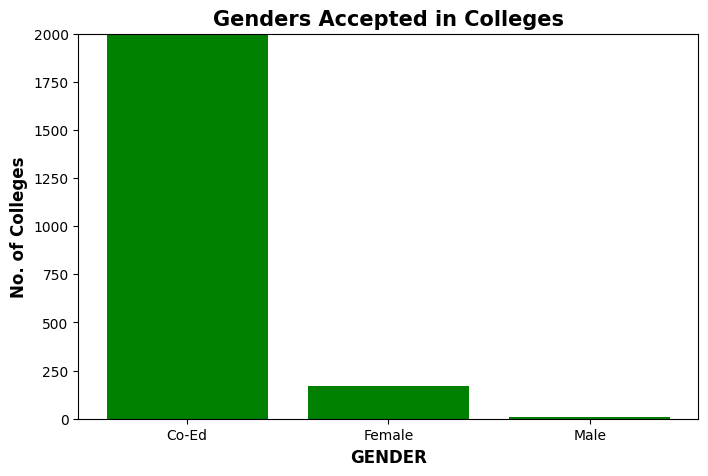

In [ ]:
# Colleges accepting only Male are significantly less compared to 'Female' only accepting colleges

plt.figure(figsize=(8,5))
plt.title('Genders Accepted in Colleges',size=15,fontweight='bold')
plt.bar(df['Genders Accepted'].value_counts().index,
         df['Genders Accepted'].value_counts().values,
         color='green')
plt.xlabel('GENDER',size=12, fontweight='bold')
plt.ylabel('No. of Colleges',size=12, fontweight='bold')
plt.ylim(0,2000)
plt.show()

In [ ]:
#Analysing colleges based on their Campus Size
df['Campus Size in Acres'].describe()
df_acres=df[['College Name','Campus Size in Acres']].sort_values('Campus Size in Acres',ascending=True).tail(10)
df_acres

College Name  Campus Size in Acres
919                       North Eastern Hill University                  1025
185                                Bangalore University                  1100
319              Indian Agricultural Research Institute                  1250
7                              Banaras Hindu University                  1300
522                   Dr Harisingh Gour Vishwavidyalaya                  1300
356                   National Dairy Research Institute                  1348
291               Bidhan Chandra Krishi Vishwavidyalaya                  1727
63                              University of Hyderabad                  2000
2441                    Navsari Agricultural University                  2278
515   Govind Ballabh Pant University of Agriculture ...                 16000

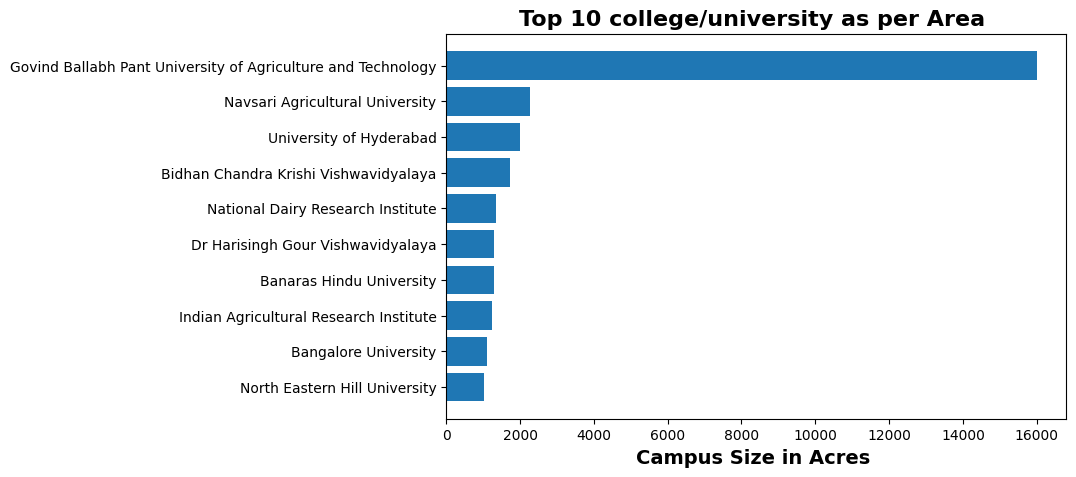

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Top 10 college/university as per Area ',
          size=16,
          fontweight='bold')
plt.barh(y=df_acres['College Name'],
         width=df_acres['Campus Size in Acres'],
         )
plt.xlabel('Campus Size in Acres ',size=14, fontweight='bold')
#plt.ylabel('Colleges',size=12, fontweight='bold')
plt.show()

In [ ]:
df['Campus Size in Acres']

0       647
1       215
2       145
3       980
4        66
       ... 
5430      4
5431      0
5432      0
5433      0
5434      0
Name: Campus Size in Acres, Length: 5435, dtype: int64

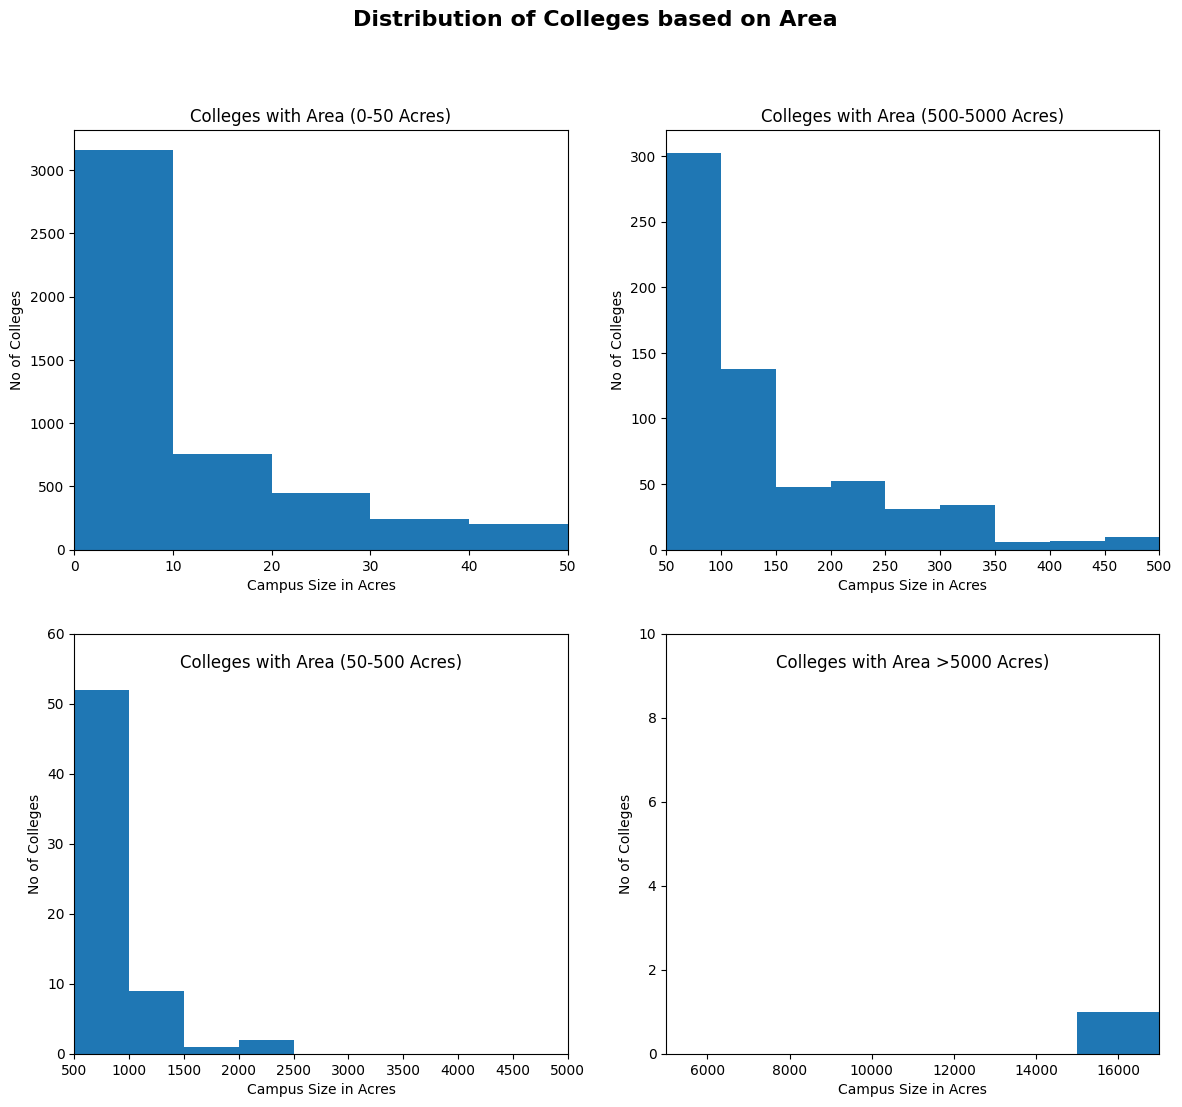

In [ ]:
# Since the areas of colleges are distributed from few acres to few thousand acres, it would be better to
# divide the Area into sub-groups and plot against the count of colleges to get clear picture of counts

fig, ax = plt.subplots(2,2,figsize=(14,12))
fig.suptitle('Distribution of Colleges based on Area ',
              size=16,
              fontweight='bold')
ax[0,0].hist(df['Campus Size in Acres'],bins=[0,10,20,30,40,50])
ax[0,0].set_xlabel('Campus Size in Acres')
ax[0,0].set_ylabel('No of Colleges')
ax[0,0].set_title('Colleges with Area (0-50 Acres)')
ax[0,0].set_xlim(0, 50)
#ax[0,0].set_ylim(0, 500)
#ax[0,0].plot(t,d,label="d = 5t",color='red', linestyle='--', linewidth=3, marker='^')
#ax[0,0].legend()

ax[0,1].hist(df['Campus Size in Acres'],bins=[50,100,150,200,250,300,350,400,450,500])
ax[0,1].set_xlabel('Campus Size in Acres')
ax[0,1].set_ylabel('No of Colleges')
ax[0,1].set_title('Colleges with Area (500-5000 Acres)')
ax[0,1].set_xlim(50,500)
ax[0,1].set_ylim(0, 320)

ax[1,0].hist(df['Campus Size in Acres'],bins=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
ax[1,0].set_xlabel('Campus Size in Acres')
ax[1,0].set_ylabel('No of Colleges')
ax[1,0].set_title('Colleges with Area (50-500 Acres)',x=0.5,y=0.9)
ax[1,0].set_xlim(500,5000)
ax[1,0].set_ylim(0, 60)
#ax[1,0].set_xticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000],rotation=70)

ax[1,1].hist(df['Campus Size in Acres'],bins=[5000,7000,9000,11000,13000,15000,17000])
ax[1,1].set_xlabel('Campus Size in Acres')
ax[1,1].set_ylabel('No of Colleges')
ax[1,1].set_title('Colleges with Area >5000 Acres)',x=0.5,y=0.9)
ax[1,1].set_xlim(5000,17000)
ax[1,1].set_ylim(0, 10)
#plt.xticks(rotation=50)

plt.show()


# Most colleges have campus area of  less than 100 Acres, and majority of them have less than 10 acres.

In [ ]:
df_year=df[df['Established Year']>0].sort_values('Established Year')
df_year.head()

College Name Genders Accepted  \
68                              University of Calcutta            Co-Ed   
244                               University of Madras            Co-Ed   
85                                University of Mumbai            Co-Ed   
3685  PT Lee Chengalvaraya Naicker Polytechnic College            Co-Ed   
23            Veermata Jijabai Technological Institute            Co-Ed   

      Campus Size in Acres  Total Student Enrollments  Established Year  \
68                       3                      16463              1857   
244                      0                      41329              1857   
85                     243                      78034              1857   
3685                     0                       1005              1886   
23                      16                       3575              1887   

      Rating                    University     City        State  \
68       3.2            Data not Available  Kolkata  West Bengal   
244      3.3            Data not Available  Chennai   Tamil Nadu   
85       0.0            Data not Available   Mumbai  Maharashtra   
3685     0.0            Data not Available  Chennai   Tamil Nadu   
23       0.0  University of Mumbai, Mumbai   Mumbai  Maharashtra   

           College Type  Average Fees  
68    Public/Government         23747  
244   Public/Government         73196  
85    Public/Government        126891  
3685            Private         56093  
23    Public/Government        177209

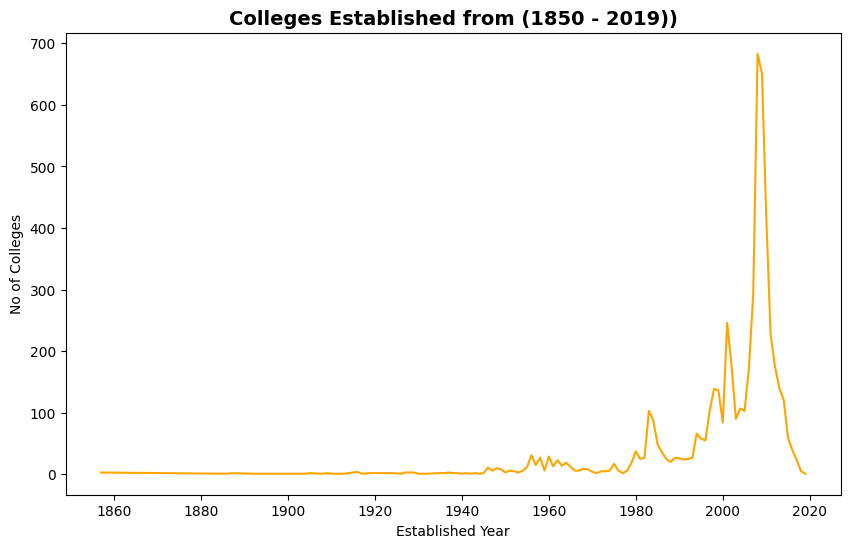

In [ ]:
# We can infer that most colleges were opened during the period 2000 -2020

plt.figure(figsize=(10,6))
sns.lineplot(x=df_year['Established Year'].value_counts().index,
             y=df_year['Established Year'].value_counts().values,
             color="orange")
plt.xlabel('Established Year')
plt.ylabel('No of Colleges')
plt.title('Colleges Established from (1850 - 2019))',
           size=14,
           fontweight='bold')
plt.show()

In [ ]:
df['University'].value_counts()

University
Data not Available                                      1932
Anna University, Chennai                                 511
Dr APJ Abdul Kalam Technical University, Lucknow         282
Jawaharlal Nehru Technological University, Hyderabad     245
Rajiv Gandhi Proudyogiki Vishwavidyalaya, Bhopal         208
                                                        ... 
Dr BR Ambedkar University, Agra                            1
Assam University, Silchar                                  1
Dr DY Patil University, Navi Mumbai                        1
West Bengal University of Health Sciences, Kolkata         1
Vivekananda Global University, Jaipur                      1
Name: count, Length: 198, dtype: int64

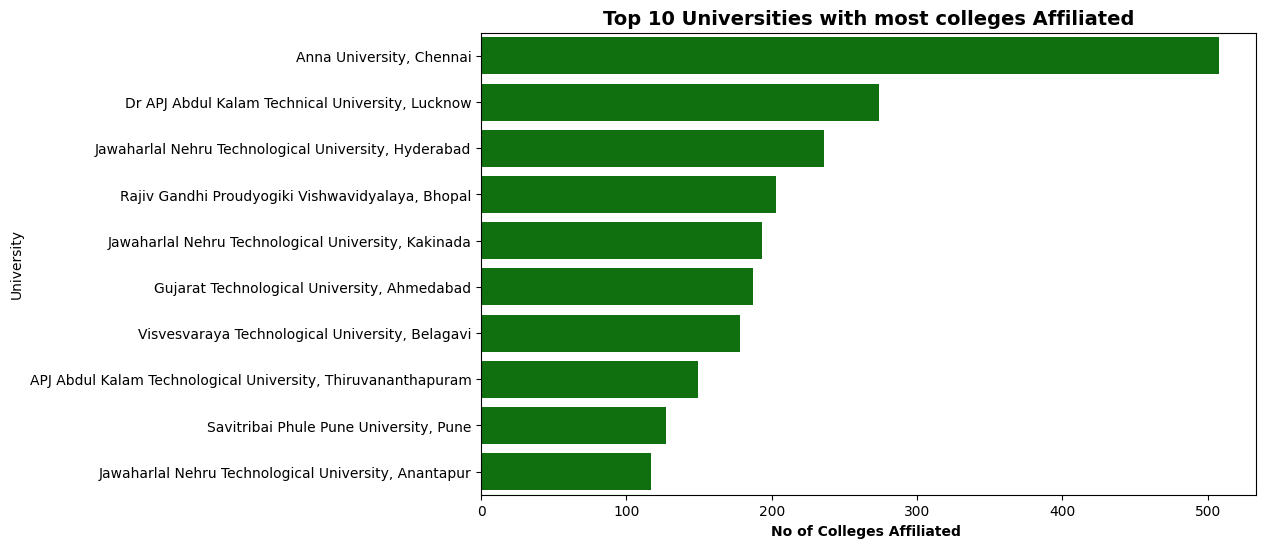

In [ ]:
# Anna University has the most Colleges affiliated

plt.figure(figsize=(10,6))
sns.barplot(y=df_year['University'].value_counts().index[1:11],
            x=df_year['University'].value_counts().values[1:11],
             color="green")
plt.xlabel('No of Colleges Affiliated ',fontweight='bold')
#plt.ylabel('University')
plt.title('Top 10 Universities with most colleges Affiliated',
           size=14,
           fontweight='bold')
plt.show()

In [ ]:
df['State'].value_counts().head()

State
Tamil Nadu        833
Maharashtra       712
Uttar Pradesh     502
Andhra Pradesh    386
Karnataka         338
Name: count, dtype: int64

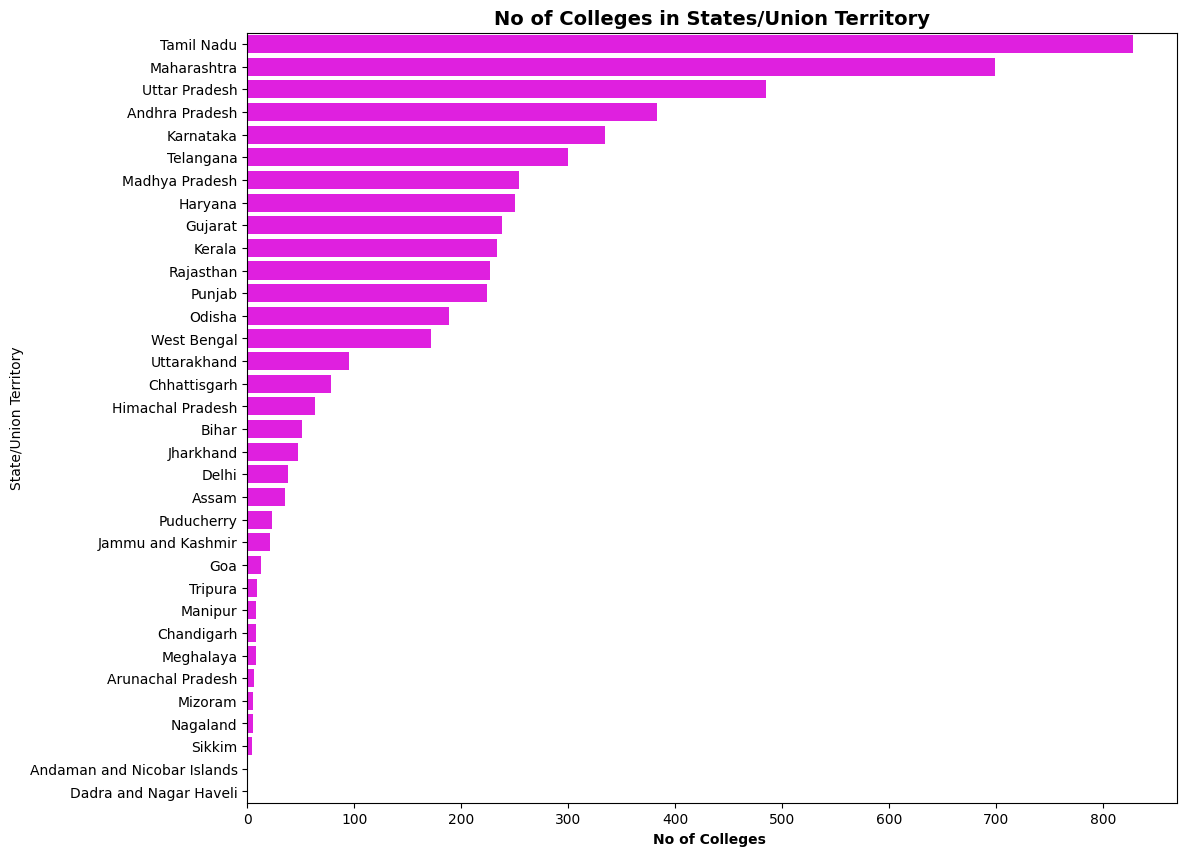

In [ ]:
#Tamil Nadu has the most no of Engineering colleges
# Similar plotting can be done for No. of colleges in Cities.

plt.figure(figsize=(12,10))
sns.barplot(y=df_year['State'].value_counts().index,
            x=df_year['State'].value_counts().values,
             color="magenta")
plt.xlabel('No of Colleges ',fontweight='bold')
plt.ylabel('State/Union Territory')
plt.title('No of Colleges in States/Union Territory',
           size=14,
           fontweight='bold')
plt.show()

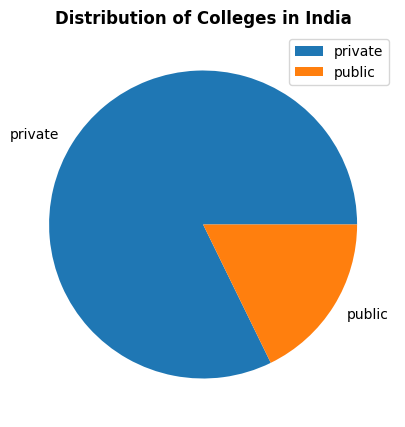

In [ ]:
plt.figure(figsize=(7,5))
df['College Type'].value_counts()
private=df['College Type'].value_counts().values[0]/(df['College Type'].value_counts().sum())
public=df['College Type'].value_counts().values[1]/(df['College Type'].value_counts().sum())
plt.pie([private*100,public*100],labels=['private','public'])
plt.title('Distribution of Colleges in India',fontweight='bold')
plt.legend()

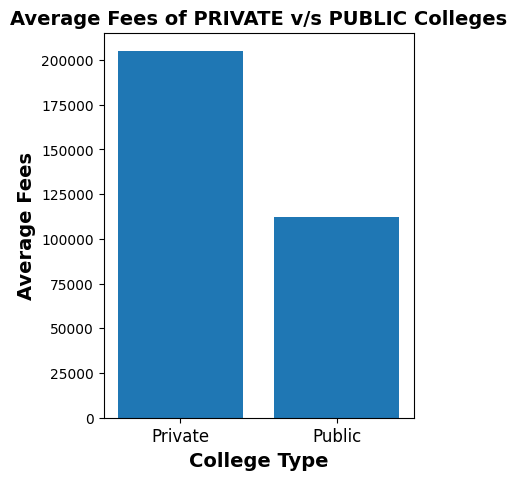

In [ ]:
df_private=df[df['College Type']=='Private']
df_private['Average Fees'].mean()
df_public=df[df['College Type']=='Public/Government']
df_public['Average Fees'].mean()

plt.figure(figsize=(4,5))
plt.title('Average Fees of PRIVATE v/s PUBLIC Colleges',size=14,fontweight='bold')
plt.bar(x=['Private','Public'],height= [df_private['Average Fees'].mean(),df_public['Average Fees'].mean()])
plt.xlabel('College Type',size=14,fontweight='bold')
plt.ylabel('Average Fees',size=14,fontweight='bold')
plt.xticks(size=12)
plt.show()


In [ ]:
# Find the average fees of each city by considering only cities which have colleges more than 10

city_fees=[]
for i in range(len(df['City'].value_counts().index)):
    if (df['City'].value_counts().values[i])>=10:
        city_fees.append(df['City'].value_counts().index[i])

len(city_fees)
df_city=df[df['City'].isin(city_fees)]

<ipython-input-61-863b2e89907d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



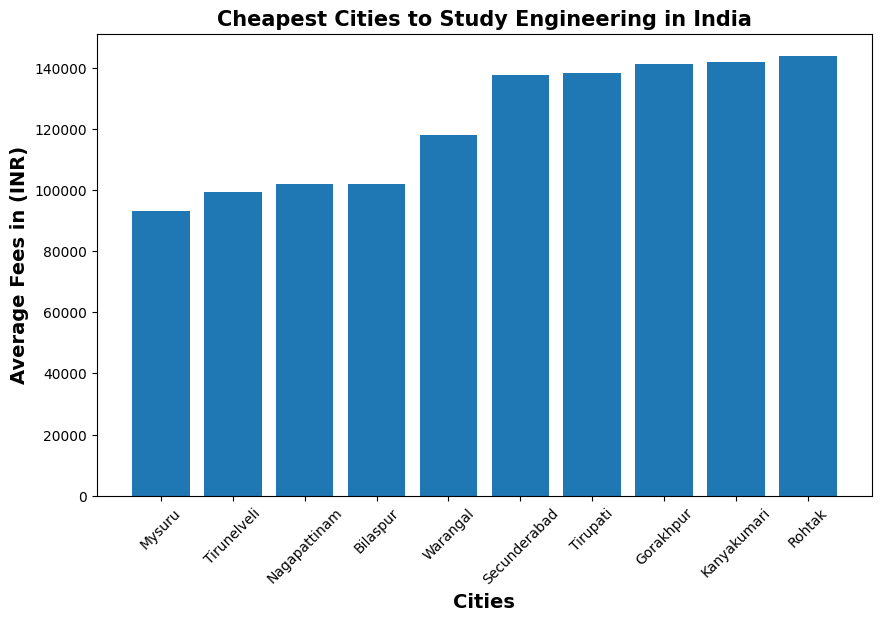

In [ ]:
# Cheapest Cities to Study Engineering in India

# Convert 'Average Fees' to numeric, handling errors
df_city['Average Fees'] = pd.to_numeric(df_city['Average Fees'], errors='coerce')

df_city_fees=df_city.groupby(['City'])['Average Fees'].mean()
city_x=df_city_fees.sort_values(ascending=True).head(10).index
fees_y=df_city_fees.sort_values(ascending=True).head(10).values

plt.figure(figsize=(10,6))
plt.title('Cheapest Cities to Study Engineering in India',size=15,fontweight='bold')
plt.bar(x=city_x,height= fees_y)
plt.xlabel('Cities',size=14,fontweight='bold')
plt.ylabel('Average Fees in (INR)',size=14,fontweight='bold')
plt.xticks(size=10,rotation=45)
plt.show()

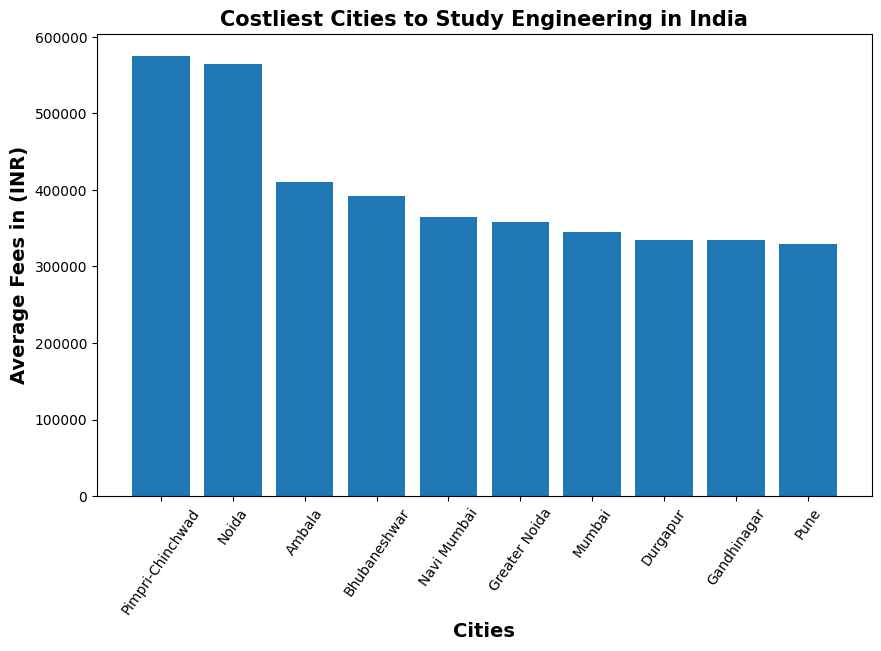

In [ ]:
#Costliest Cities to Study Engineering in India

city_x=df_city_fees.sort_values(ascending=False).head(10).index # remove ['Average Fees']
fees_y=df_city_fees.sort_values(ascending=False).head(10).values # remove ['Average Fees']


plt.figure(figsize=(10,6))
plt.title('Costliest Cities to Study Engineering in India',size=15,fontweight='bold')
plt.bar(x=city_x,height= fees_y)
plt.xlabel('Cities',size=14,fontweight='bold')
plt.ylabel('Average Fees in (INR)',size=14,fontweight='bold')
plt.xticks(size=10,rotation=55)
plt.show()